<a href="https://colab.research.google.com/github/pradeepnegi88/practical-statistics/blob/main/StatisticsPractical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

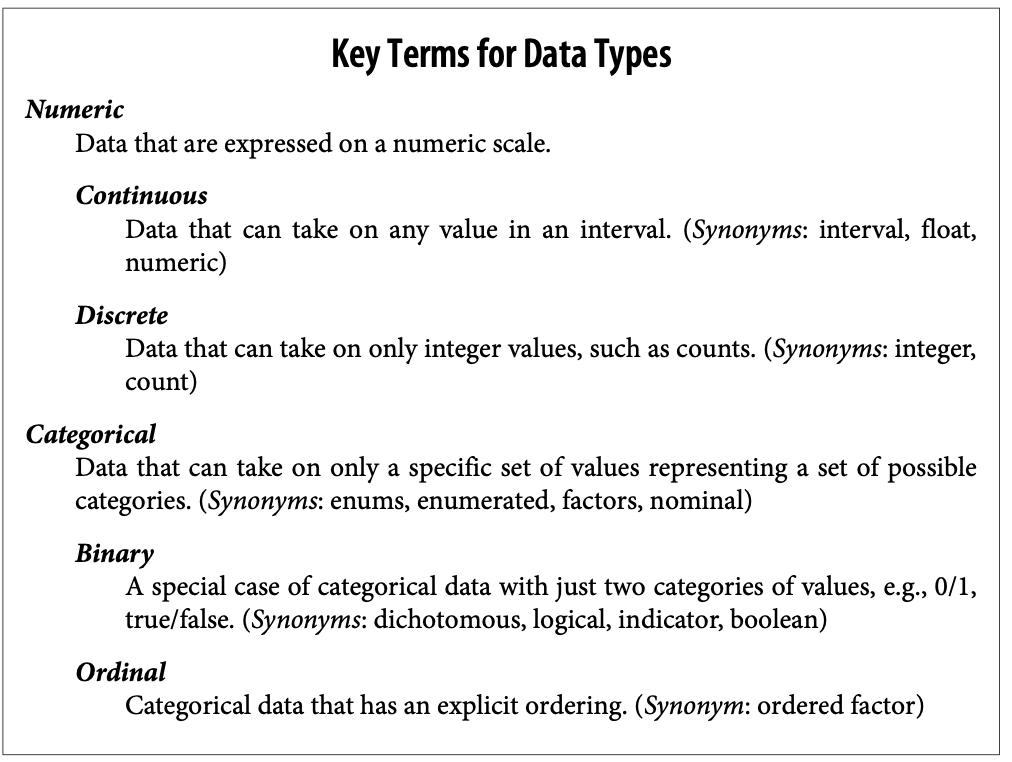

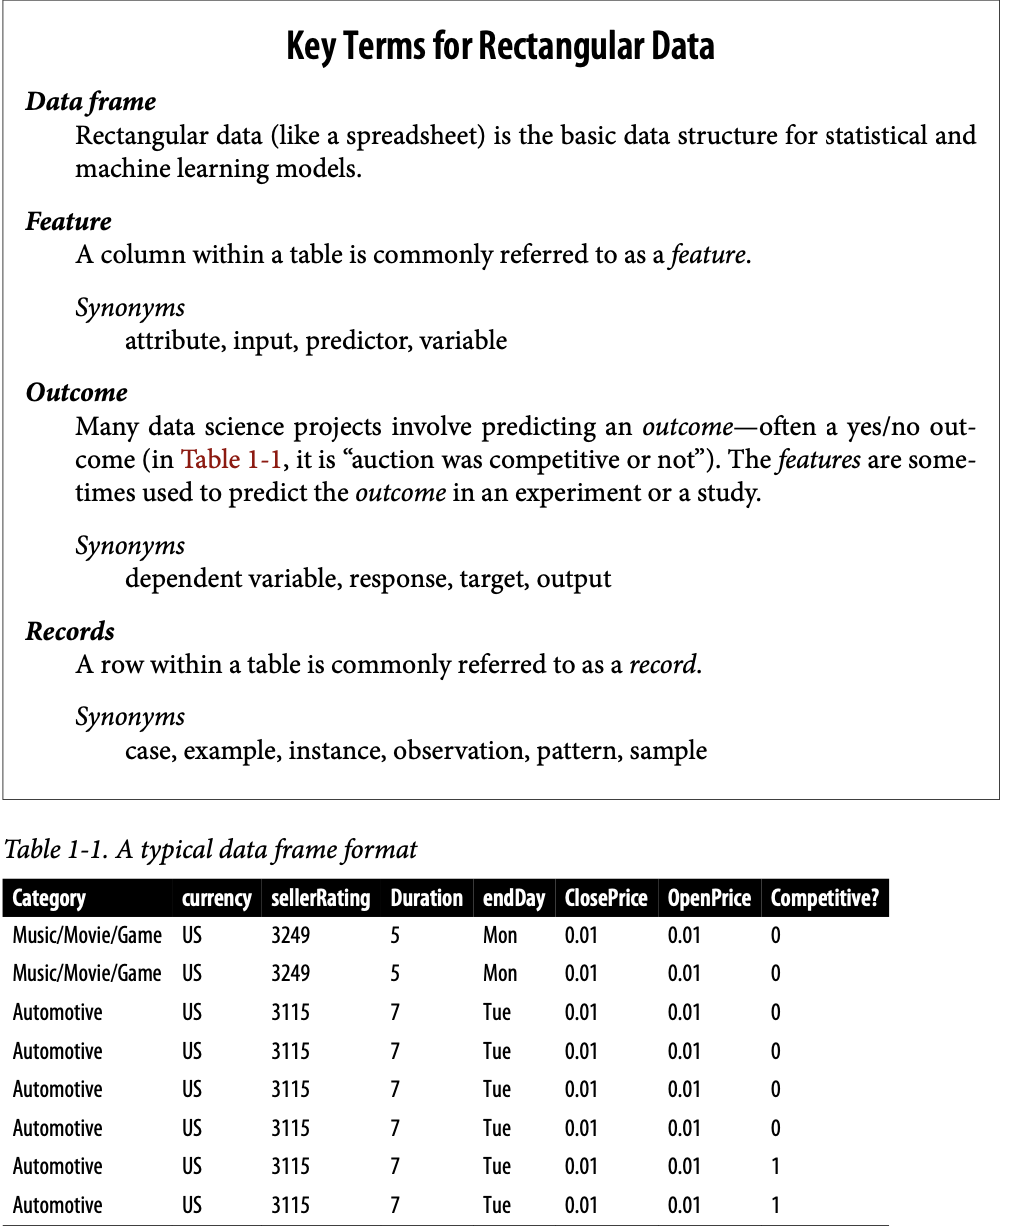

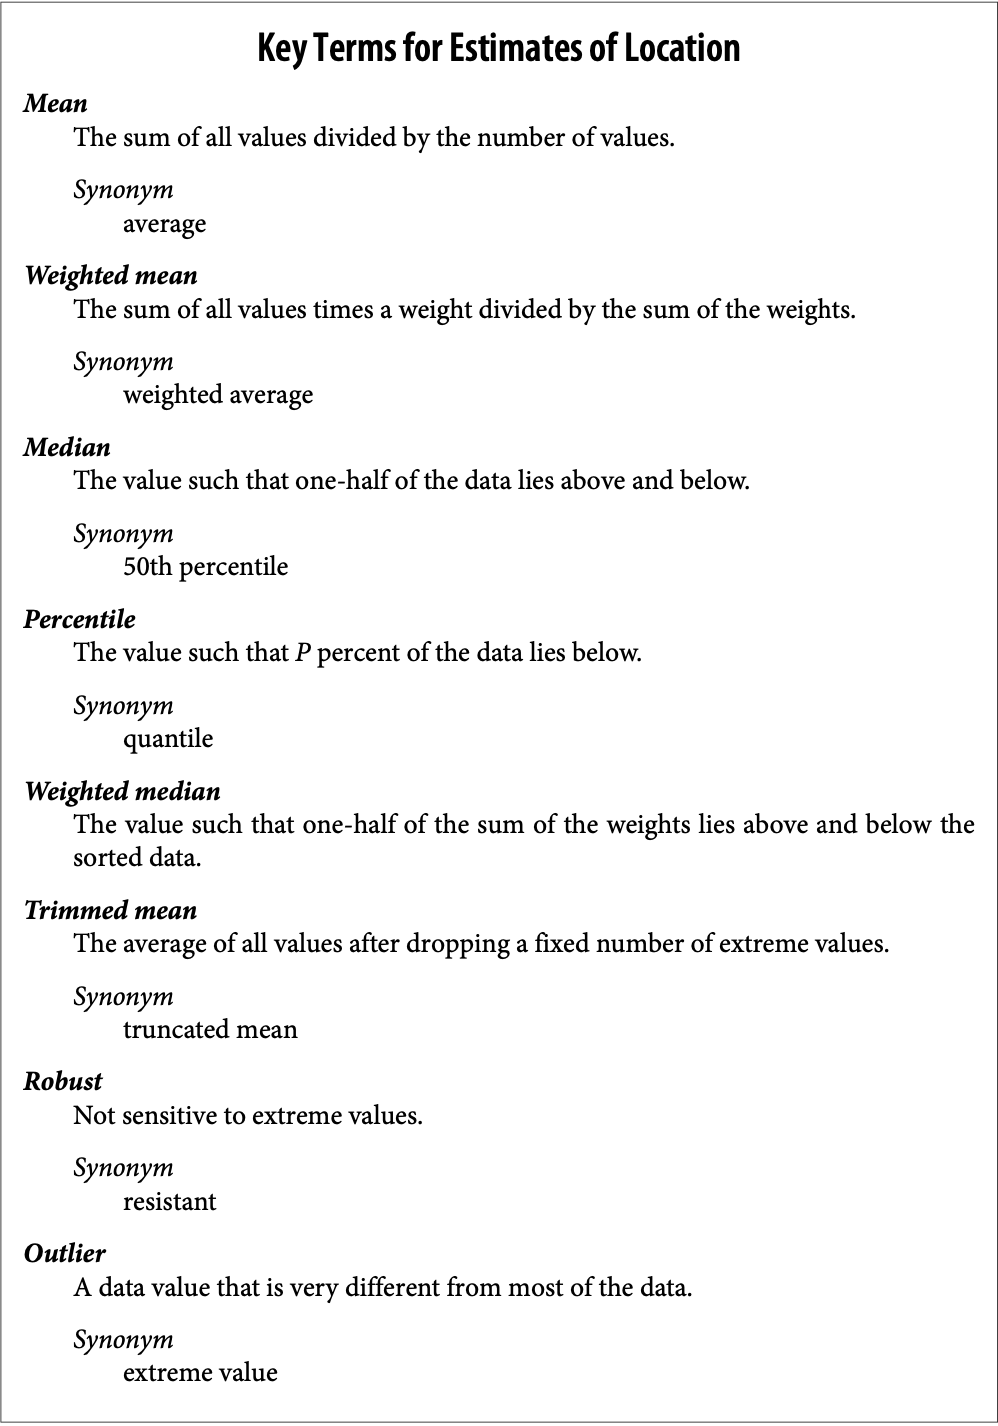

***Metrics and Estimates*** 

Statisticians often use the term estimate for a value calculated from the data at hand, to draw a distinction between what we see from the data and the theoretical true or exact state of affairs. 

Data scientists and business analysts are more likely to refer to such a value as a metric. 

The difference reflects the approach of statistics versus that of data science: accounting for uncertainty lies at the heart of the discipline of statistics, whereas concrete business or organizational objectives are the focus of data science. Hence, statisticians estimate, and data scientists measure.

#Example of a **Trimmed Mean**
Let's say, as an example, a figure skating competition produces the following scores: 6.0, 8.1, 8.3, 9.1, and 9.9.

The mean for the scores would equal:

((6.0 + 8.1 + 8.3 + 9.1 + 9.9) / 5) = 8.28
To trim the mean by a total of 40%, we remove the lowest 20% and the highest 20% of values, eliminating the scores of 6.0 and 9.9.

Next, we calculate the mean based on the calculation:

(8.1 + 8.3 + 9.1) / 3 = 8.50
In other words, a mean trimmed at 40% would equal 8.5 versus 8.28, which reduced the outlier bias and had the effect of increasing the reported average by 0.22 points.

Another type of mean is a weighted mean, which you calculate by multiplying each data value xi by a user-specified weight wi and dividing their sum by the sum of the weights. The formula for a weighted mean is:




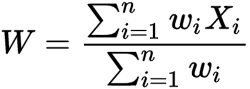






A weighted average or mean is one where each item being averaged is multiplied by a number (weight) based on the item's relative importance, rather than treating each item equally. The weights or weightings are the equivalent of having that many similar items with the same value involved in the average.

#Weighted Median
**bold text**

If you have your five data the median is just the value appearing in the third position. Now, assume you have



```
data weight

13    10
23    03
54    04
```



where the weight is the number of times that a given data appears. Now, you have 17 data. The weighted median is the value in 9th (18/2)position, that is, 13.
In fact, when you compute the median with your data you are actually working with a weighted data



In [ ]:
import pandas as pd


In [ ]:
state = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv")
state

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE
8,Florida,18801310,5.8,FL
9,Georgia,9687653,5.7,GA


In [ ]:
state['Population'].mean(),state['Population'].median()

(6162876.3, 4436369.5)

In [ ]:
from scipy.stats import trim_mean
trim_mean(state['Population'], 0.1)

4783697.125

If we want to compute the average murder rate for the country, we need to use a weighted mean or median to account for different populations in the states. 

In [ ]:

import numpy as np
np.average(state['Murder.Rate'],weights= state['Population'])

4.445833981123393

**Estimates of Variability**

dispersion, measures whether the data values are tightly clus‐ tered or spread out

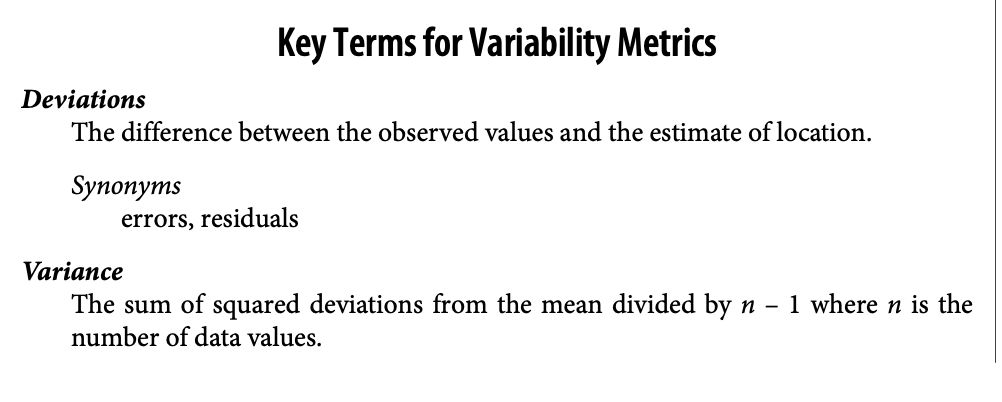
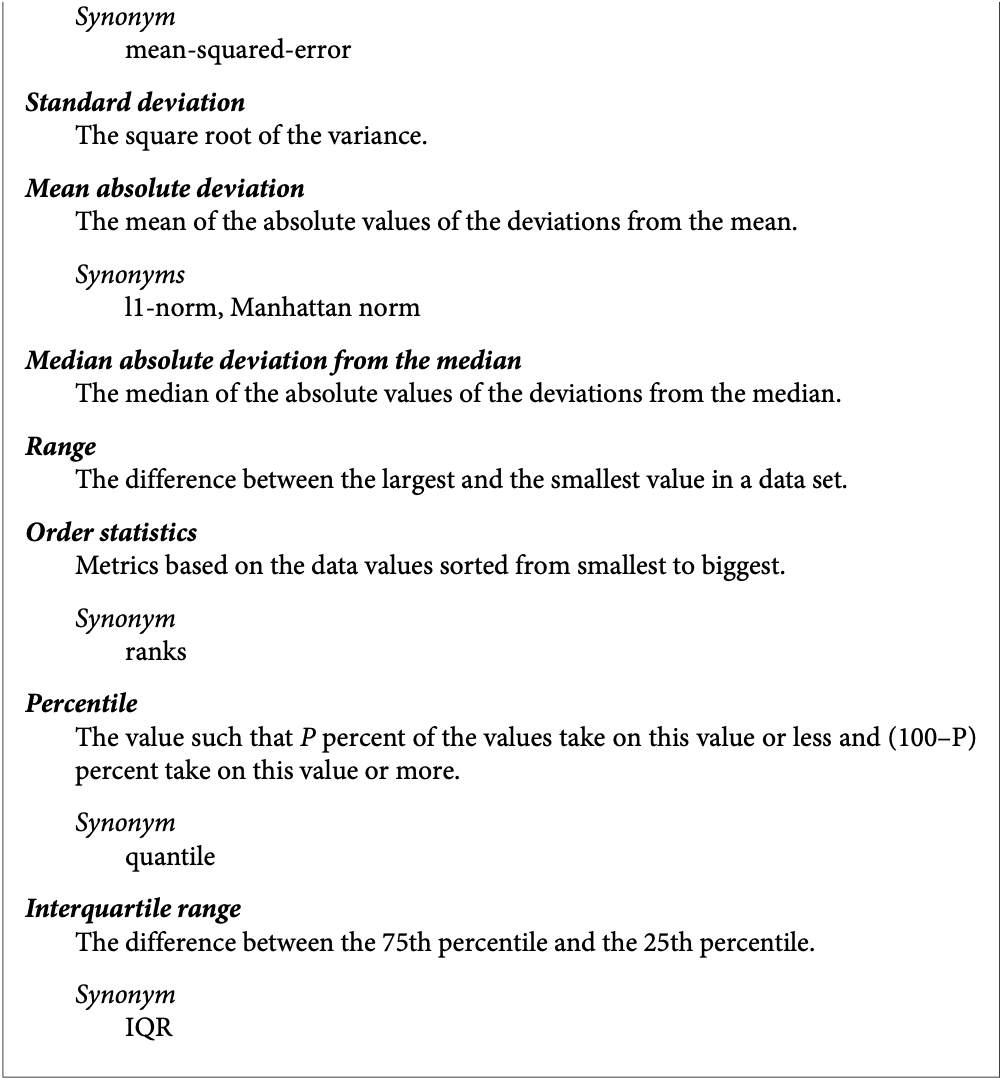

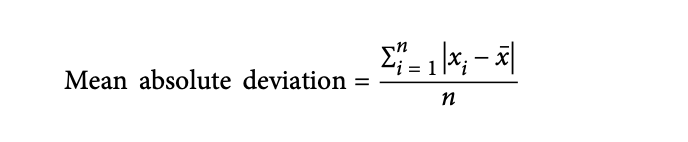
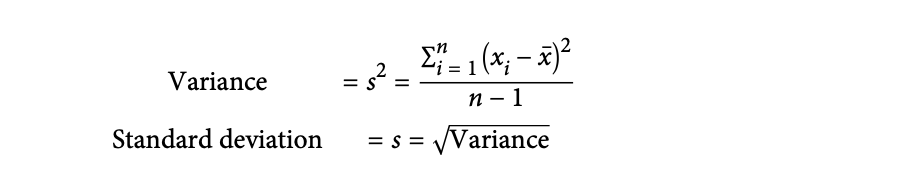

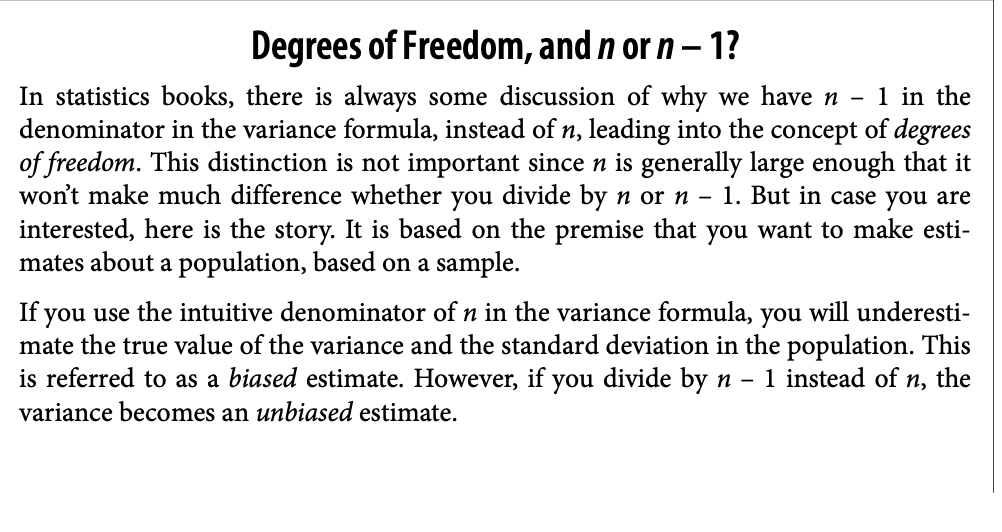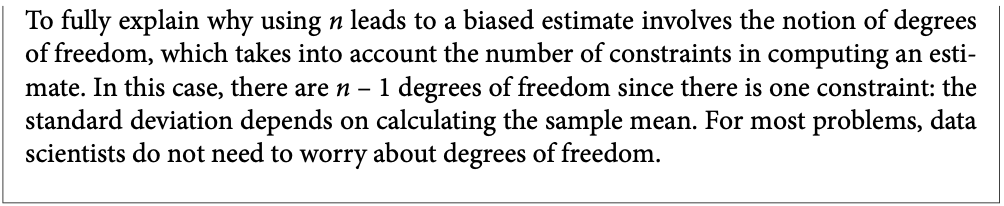

***The variance and standard deviation are especially sensitive to outliers since they are based on the squared deviations.***

A robust estimate of variability is the median absolute deviation from the median or MAD:

Median absolute deviation = Median (|x1 − m| , |x2 − m| ,..., |xN − m|)
where m is the median.

***Like the median, the MAD is not influenced by extreme values.***

In [ ]:
from statsmodels.robust.scale import mad
  
print(state['Population'].std())
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))
print(mad(state['Population']))

6848235.347401142
4847308.0
3849876.1459979336


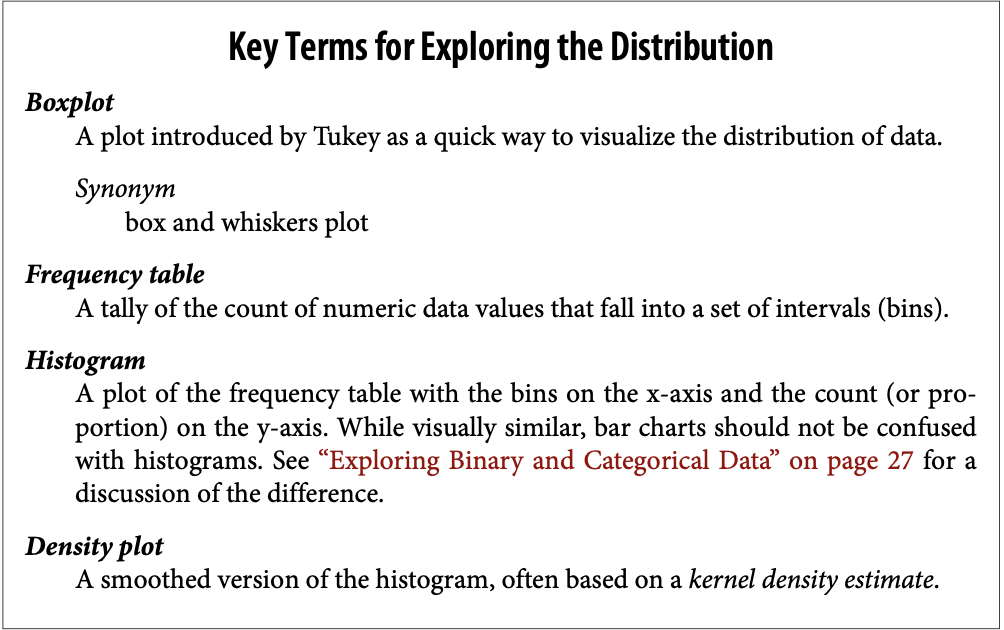

In [ ]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])


0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

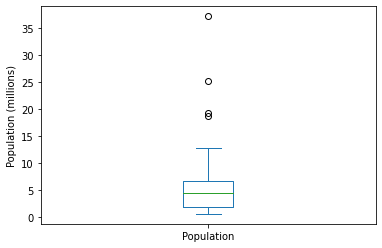

In [ ]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

From this boxplot we can immediately see that the median state population is about 5 million, half the states fall between about 2 million and about 7 million, and there are some high population outliers. The top and bottom of the box are the 75th and 25th percentiles, respectively. The median is shown by the horizontal line in the box. The dashed lines, referred to as whiskers, extend from the top and bottom of the box to indicate the range for the bulk of the data. There are many variations of a boxplot;

#**Frequency Tables and Histograms**

A frequency table of a variable divides up the variable range into equally spaced segments and tells us how many values fall within each segment.

In [ ]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

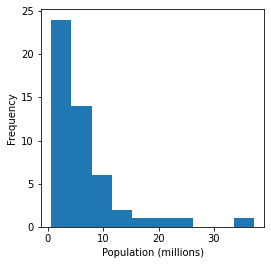

In [ ]:
ax = (state['Population'] / 1000000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')


#**Statistical Moments**
In statistical theory, location and variability are referred to as the first and second moments of a distribution. The third and fourth moments are called skewness and kurtosis. Skewness refers to whether the data is skewed to larger or smaller values, and kurtosis indicates the propensity of the data to have extreme values. Generally, metrics are not used to measure skewness and kurtosis; instead, these are discovered through visual displays

Skewness = (Mean-Mode)/SD = 3*(Mean-Median)/SD

Since, (Mode = 3*Median-2*Mean)

ref:https://www.analyticsvidhya.com/blog/2022/01/moments-a-must-known-statistical-concept-for-data-science/

#**kurtosis**

– It measures the amount in the tails and outliers.

– It focuses on the tails of the distribution and explains whether the distribution is flat or rather with a high peak. This measure informs us whether our distribution is richer in extreme values than the normal distribution.

For Example, For a normal distribution, the value of Kurtosis equals 3

For Kurtosis not equal to 3, there are the following cases:

– Kurtosis<3 [Lighter tails]: Negative kurtosis indicates a broad flat distribution.

– Kurtosis>3 [Heavier tails]: Positive kurtosis indicates a thin pointed distribution.


Text(0.5, 0, 'Murder Rate (per 100,000)')

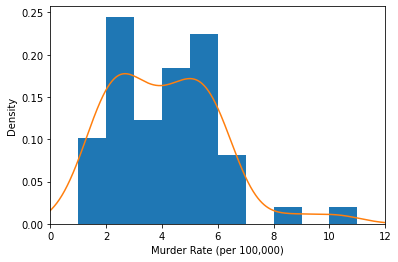

In [ ]:
modeee = state['Population'].mode().max() # Mode 
meann = state['Population'].mean()
sd = state['Population'].std()
median = state['Population'].median()


ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')



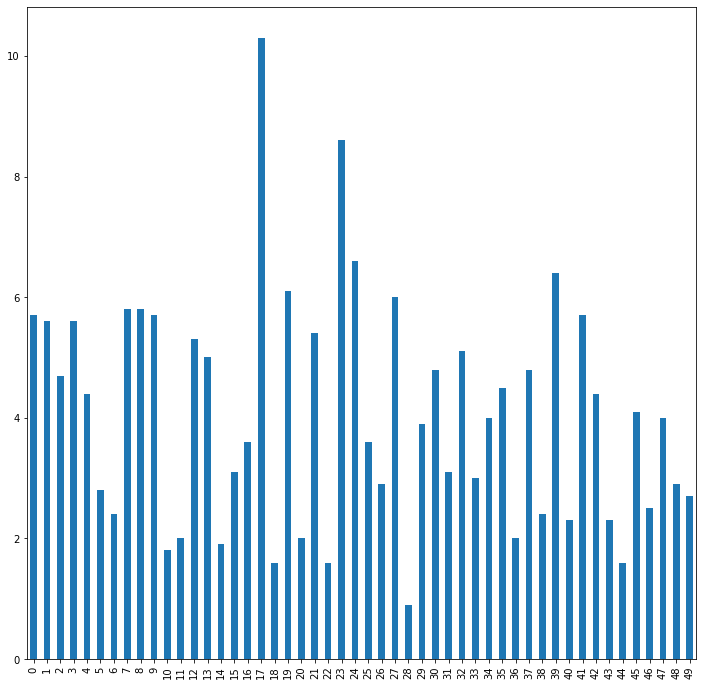

In [ ]:
state['Murder.Rate'].plot.bar(figsize=(12, 12), legend=False)
 

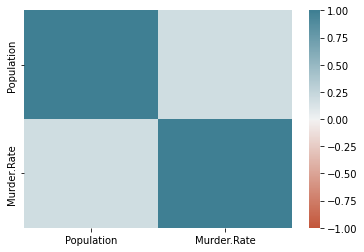

In [ ]:
import seaborn as sns
sns.heatmap(state.corr(), vmin=-1, vmax=1,
                cmap=sns.diverging_palette(20, 220, as_cmap=True))


Key Ideas
• The correlation coefficient measures the extent to which two paired variables (e.g., height and weight for individuals) are associated with one another.
• When high values of v1 go with high values of v2, v1 and v2 are positively associated.
• When high values of v1 go with low values of v2, v1 and v2 are negatively associated.
• The correlation coefficient is a standardized metric, so that it always ranges from –1 (perfect negative correlation) to +1 (perfect positive correlation).
• A correlation coefficient of zero indicates no correlation, but be aware that ran‐ dom arrangements of data will produce both positive and negative values for the correlation coefficient just by chance.

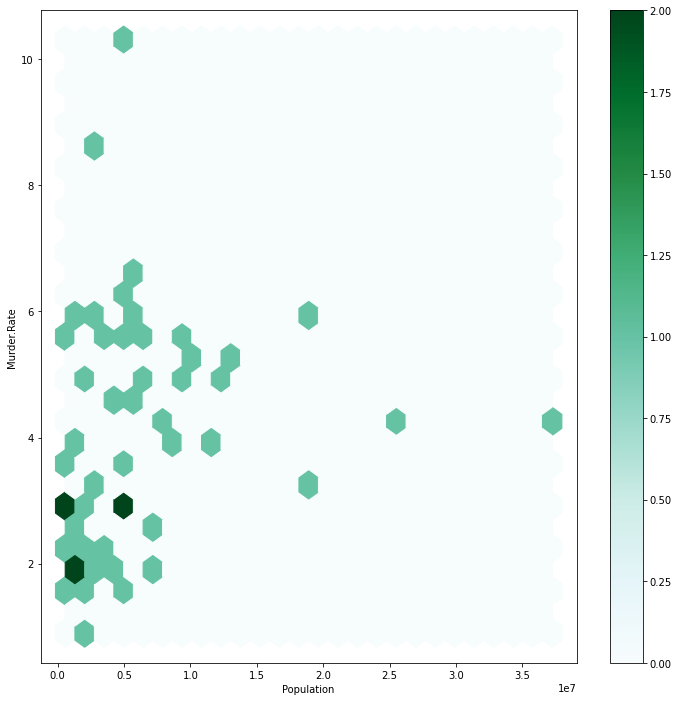

In [ ]:
ax = state.plot.hexbin(x='Population', y='Murder.Rate',
                             gridsize=25, sharex=False, figsize=(12, 12))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


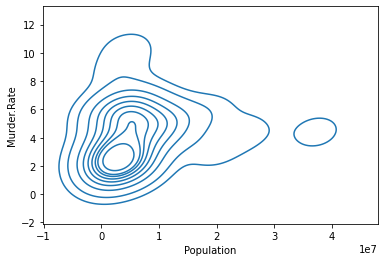

In [ ]:
ax = sns.kdeplot(state['Population'], state['Murder.Rate'])

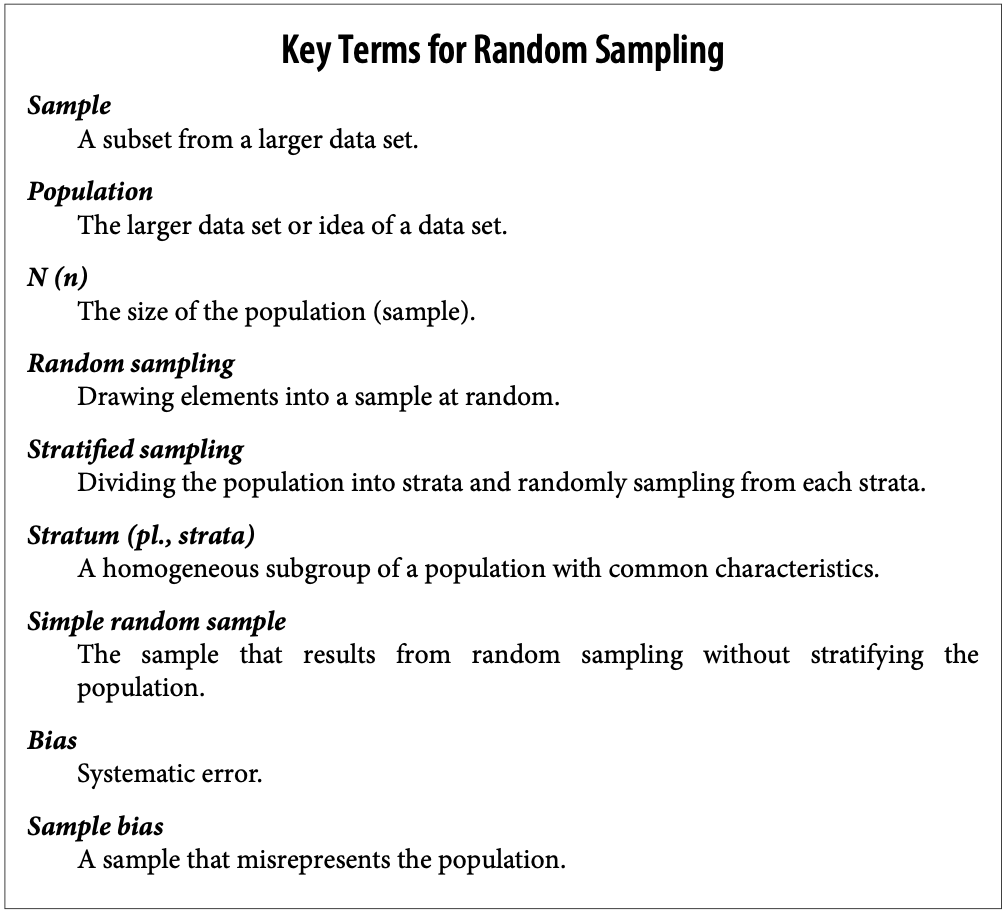

• Even in the era of big data, random sampling remains an important arrow in the data scientist’s quiver.

• Bias occurs when measurements or observations are systematically in error because they are not representative of the full population.

• Data quality is often more important than data quantity, and random sampling can reduce bias and facilitate quality improvement that would otherwise be pro‐ hibitively expensive.

                                              income        type
0              x
48270   48000
21960   42000
2355...        Data
0  [[74721.8], [81427.0], [59900.0], [58000.0], [...   Mean of 5
0  [[67823.8], [65616.1], [70762.9], [69322.5], [...  Mean of 20


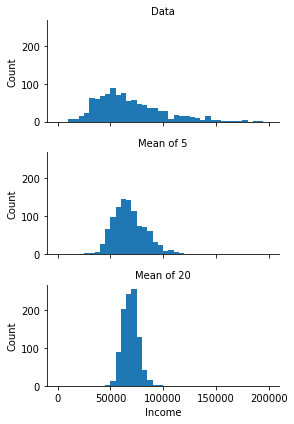

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loans_income = pd.read_csv("https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/loans_income.csv")
sample_data = pd.DataFrame([{
        'income': loans_income.sample(1000),
        'type': 'Data',
    }])

sample_mean_05 = pd.DataFrame([{
'income': [loans_income.sample(5).mean() for _ in range(1000)],
        'type': 'Mean of 5',
    }])
sample_mean_20 = pd.DataFrame([{
'income': [loans_income.sample(20).mean() for _ in range(1000)], 'type': 'Mean of 20',
    }])
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results)
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

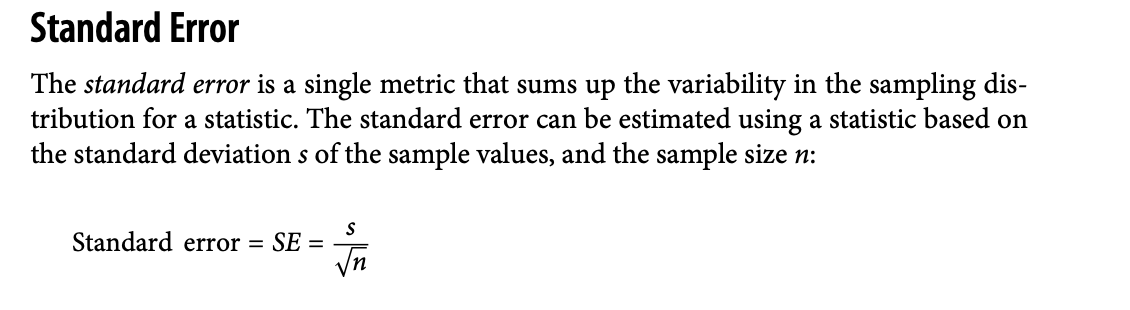

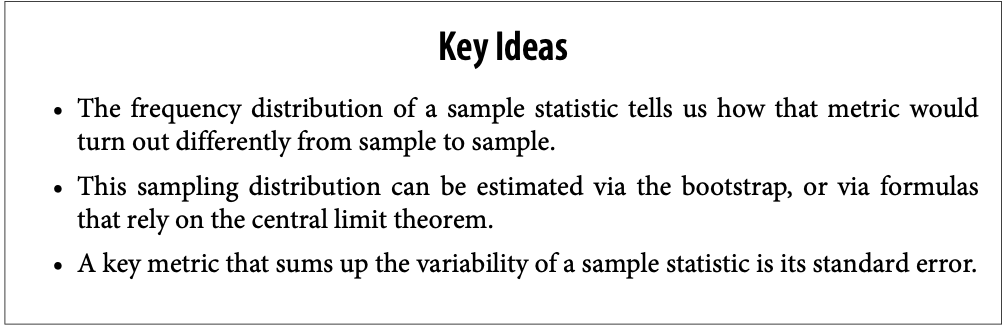

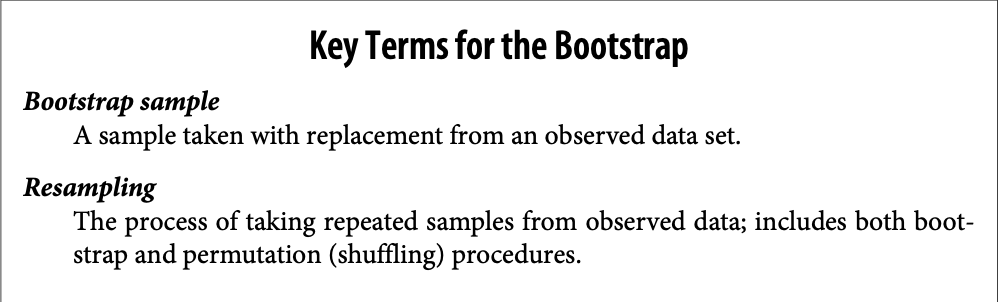

##The Bootstrap


In [13]:
from sklearn.utils import resample
results = []
for nrepeat in range(1000):
        sample = resample(loans_income)
        results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}') 
print(f'bias: {results.mean() - loans_income.median()}') 
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: x    62000.0
dtype: float64
bias: x   -72.1745
dtype: float64
std. error: 217.8052614875997


In [24]:
s = pd.Series([1, 2, 3, 4])
print(s)
s.quantile([0.05, 0.95])

0    1
1    2
2    3
3    4
dtype: int64


0.05    1.15
0.95    3.85
dtype: float64

##Confidence Intervals


68760.51844
x    55734.1
dtype: float64
47060.0


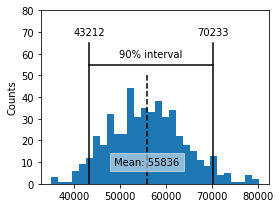

In [34]:
print(loans_income.mean()['x'])
np.random.seed(seed=3)  
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean()['x'])

results = pd.Series(results,None)
print(results[0])    

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

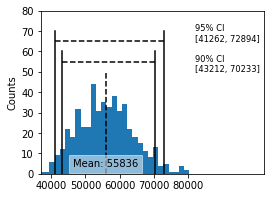

In [35]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean()['x'])
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

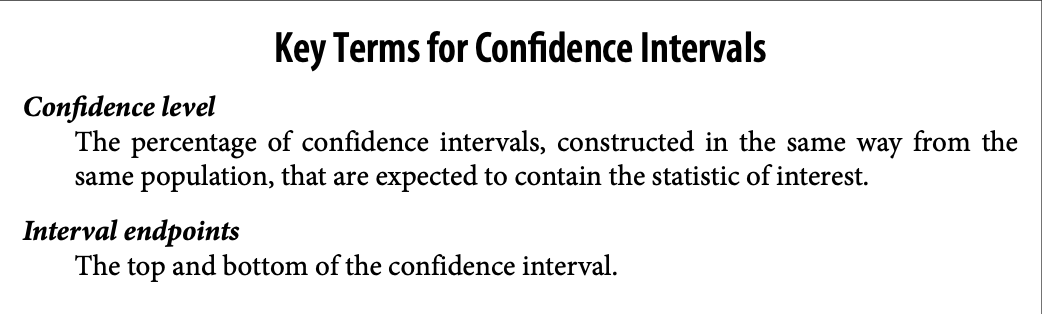

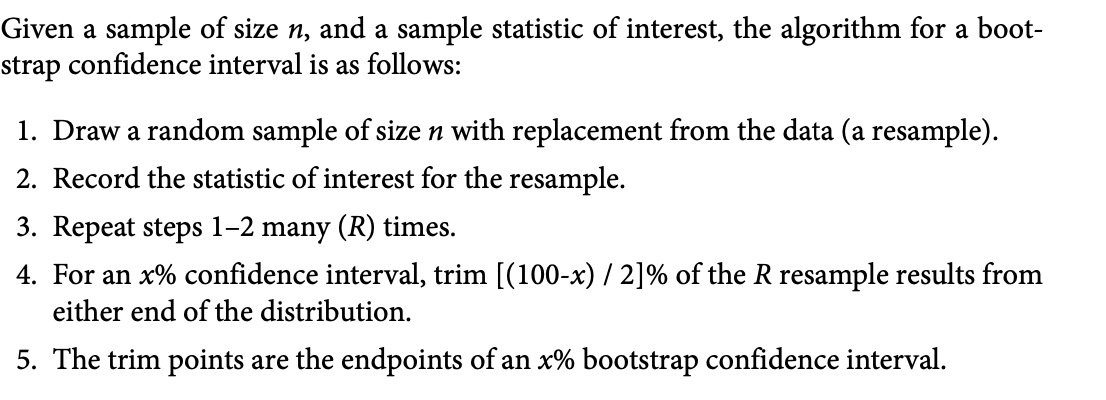

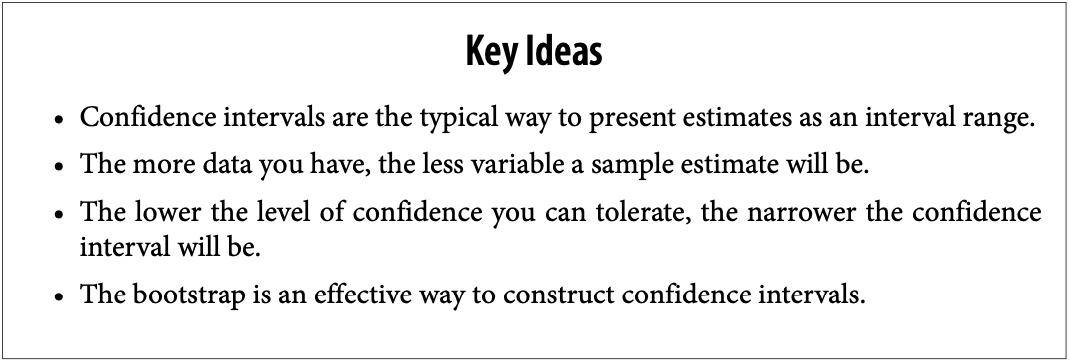

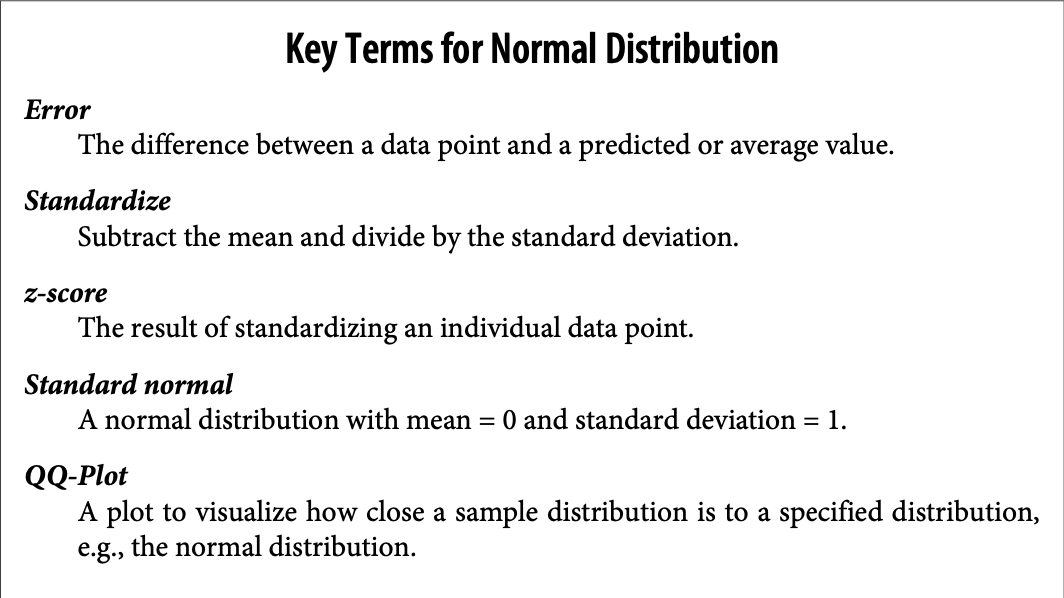

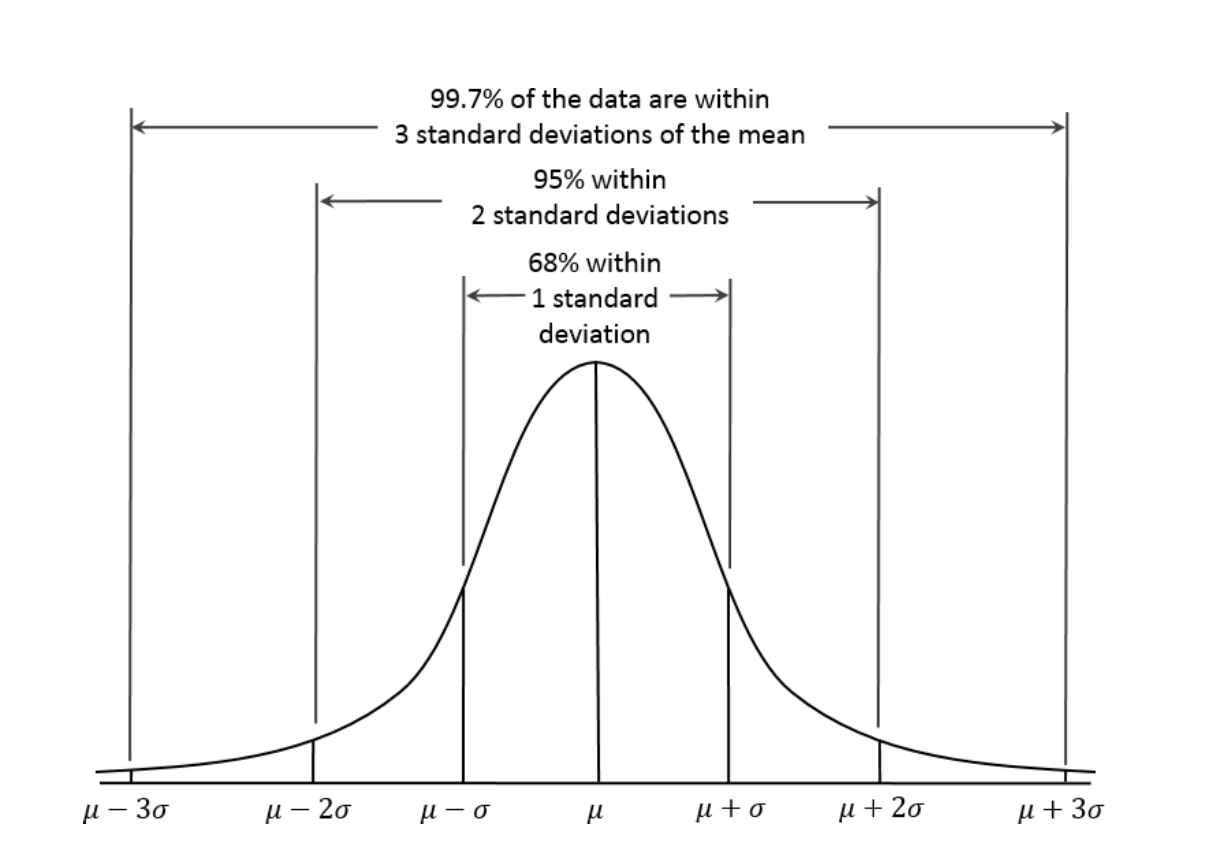

To compare data to a standard normal distribution, you subtract the mean and then divide by the standard devia‐ tion; this is also called normalization or standardization. 


Note that “standardization” in this sense is unrelated to database record standardization (conversion to a common format). The transformed value is termed a z-score, and the normal distribution is sometimes called the z-distribution.

A QQ-Plot is used to visually determine how close a sample is to a specified distribu‐ tion—in this case, the normal distribution. The QQ-Plot orders the z-scores from low to high and plots each value’s z-score on the y-axis; the x-axis is the corresponding quantile of a normal distribution for that value’s rank. Since the data is normalized, the units correspond to the number of standard deviations away from the mean. If the points roughly fall on the diagonal line, then the sample distribution can be con‐ sidered close to normal.

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

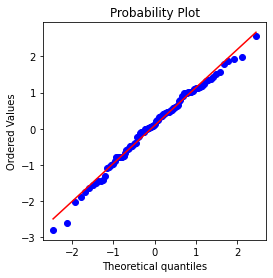

In [36]:
fig, ax = plt.subplots(figsize=(4, 4))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt